In [1]:
from train_pipeline import train

import os
import torch
from hydra import initialize, initialize_config_module, initialize_config_dir, compose
from hydra.utils import instantiate
from omegaconf import OmegaConf


def load_cfg(overrides=()):
    # with initialize_config_dir(config_dir="/app/notebooks/draft_02/conf"):
    with initialize(version_base=None, config_path="./conf"):
        cfg = compose(config_name='config', overrides=list(overrides))
        return cfg

from IPython.display import clear_output

import lovely_tensors as lt
lt.monkey_patch()

# cfg = load_cfg(overrides=[
#     "+exp=00_siren_init",
#     f"model.first_layer_init_c={1.9339}",
#     f"model.init_c={39.43}",
#     # "image=cameraman",
#     "+device=cuda:1",
# ])

cfg = load_cfg(overrides=[
    "+exp=00_siren_init",
    # f"model.first_layer_init_c={2.}",
    # f"model.init_c={40.}",
    "random_seed=[0,1]",
    'model.hidden_features=256',
    'model.hidden_layers=3',
    # "image=cameraman",
    "+device=cuda:1",
])

cfg.logging.experiment_name += '__baseline'
print(cfg.logging.experiment_name)

# train(cfg)

siren_init__initc=6__flic=1__nh=3__h=256__baseline


In [2]:
from spellbook.splitnet import plot_distributions, U

In [3]:
coords = U(2000, 2)

In [17]:
cfg = load_cfg(overrides=[
    "+exp=00_siren_init",
    # f"model.first_layer_init_c={2.}",
    # f"model.init_c={40.}",
    "random_seed=[0,1]",
    'model.hidden_features=256',
    'model.hidden_layers=3',
    # "image=cameraman",
    "+device=cuda:1",
])

model = instantiate(cfg.model, out_features=3)

out = model.forward_with_activations(coords)
out_default_init = out
out.keys()

# plot_distributions(out)

# for key, value in out.items():
#     plot_distributions({key: value}, autosize=True)

odict_keys(['input', 'layer_0_preact', 'layer_0_act', 'layer_1_preact', 'layer_1_act', 'layer_2_preact', 'layer_2_act', 'layer_3_preact', 'layer_3_act', 'layer_4_act'])

In [18]:
cfg = load_cfg(overrides=[
    "+exp=00_siren_init",
    f"model.first_layer_init_c={2.}",
    f"model.init_c={40.}",
    "random_seed=[0,1]",
    'model.hidden_features=256',
    'model.hidden_layers=3',
    # "image=cameraman",
    "+device=cuda:1",
])

model = instantiate(cfg.model, out_features=3)

out = model.forward_with_activations(coords)
out_our_init = out

input
default_init (2000, 2) in [-1.000, 1.000] μ=-0.007 σ=0.578
our_init (2000, 2) in [-1.000, 1.000] μ=-0.007 σ=0.578


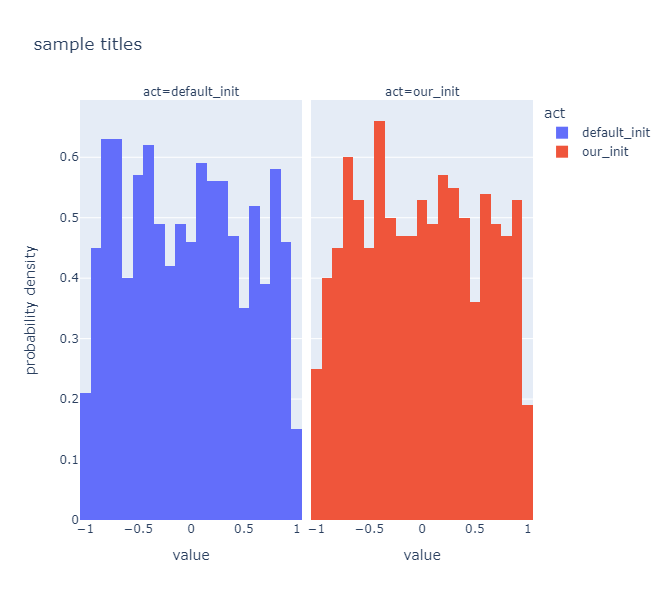

layer_0_preact
default_init (2000, 256) in [-43.425, 44.781] μ=0.232 σ=13.039
our_init (2000, 256) in [-75.103, 67.936] μ=-0.785 σ=19.149


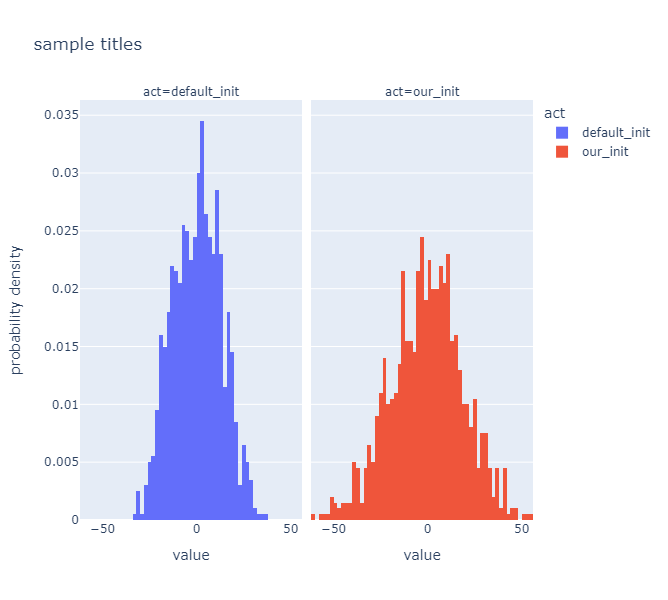

layer_0_act
default_init (2000, 256) in [-1.000, 1.000] μ=0.008 σ=0.708
our_init (2000, 256) in [-1.000, 1.000] μ=-0.001 σ=0.707


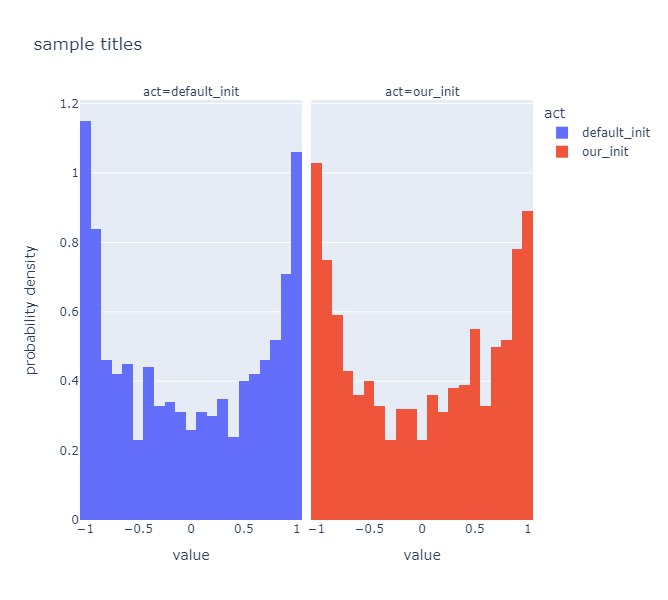

layer_1_preact
default_init (2000, 256) in [-5.539, 5.559] μ=-0.018 σ=1.473
our_init (2000, 256) in [-12.176, 13.333] μ=0.054 σ=2.793


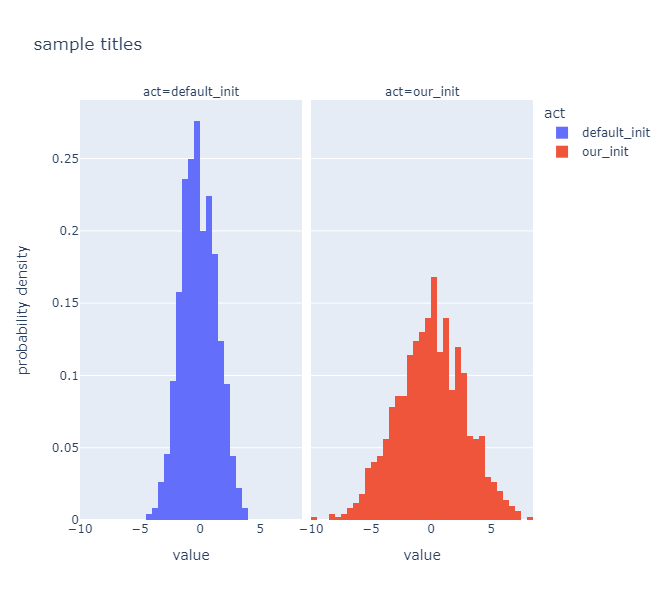

layer_1_act
default_init (2000, 256) in [-1.000, 1.000] μ=0.001 σ=0.718
our_init (2000, 256) in [-1.000, 1.000] μ=-0.000 σ=0.707


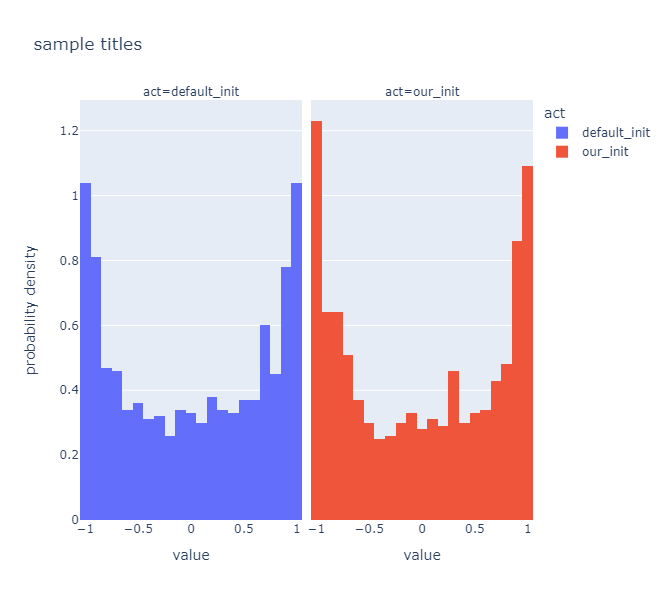

layer_2_preact
default_init (2000, 256) in [-6.275, 5.695] μ=-0.078 σ=1.462
our_init (2000, 256) in [-12.370, 12.960] μ=0.116 σ=2.782


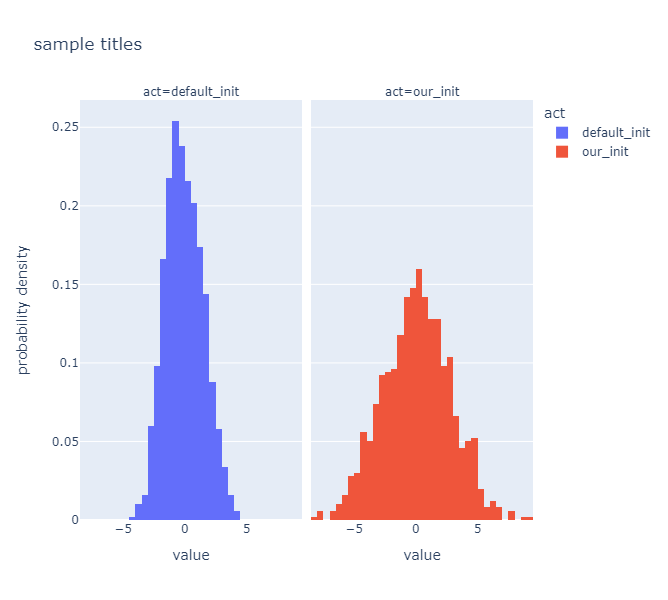

layer_2_act
default_init (2000, 256) in [-1.000, 1.000] μ=-0.045 σ=0.707
our_init (2000, 256) in [-1.000, 1.000] μ=0.003 σ=0.707


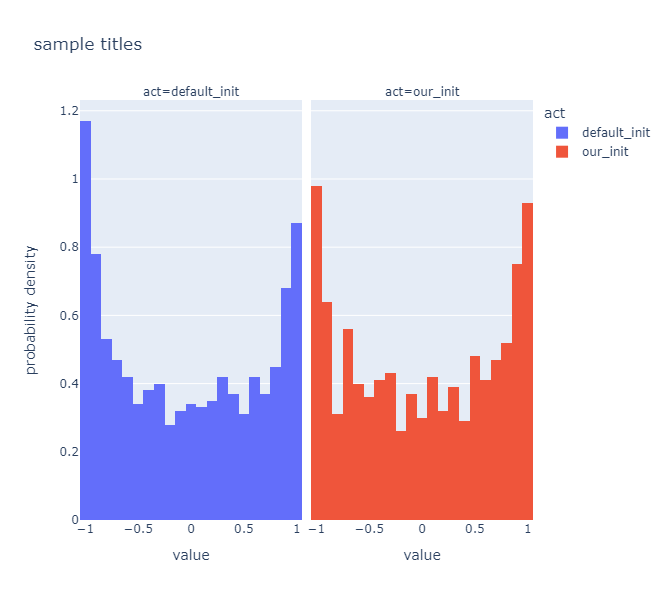

layer_3_preact
default_init (2000, 256) in [-5.490, 5.507] μ=0.130 σ=1.468
our_init (2000, 256) in [-12.290, 13.206] μ=-0.049 σ=2.798


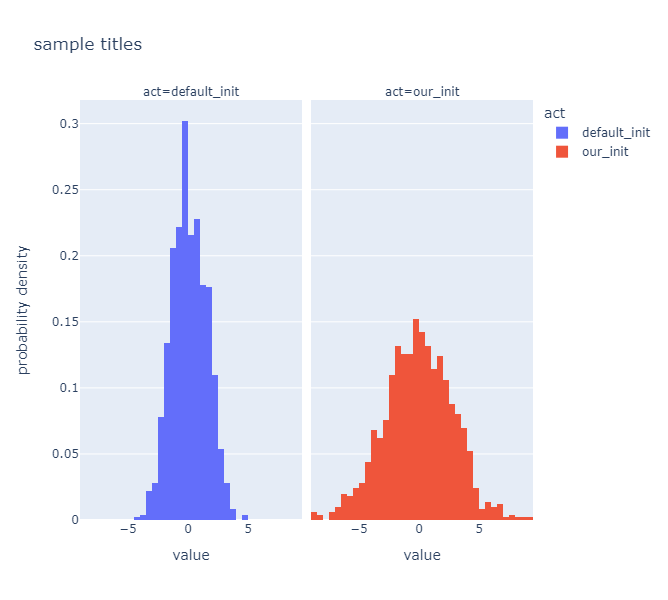

layer_3_act
default_init (2000, 256) in [-1.000, 1.000] μ=0.025 σ=0.721
our_init (2000, 256) in [-1.000, 1.000] μ=-0.001 σ=0.708


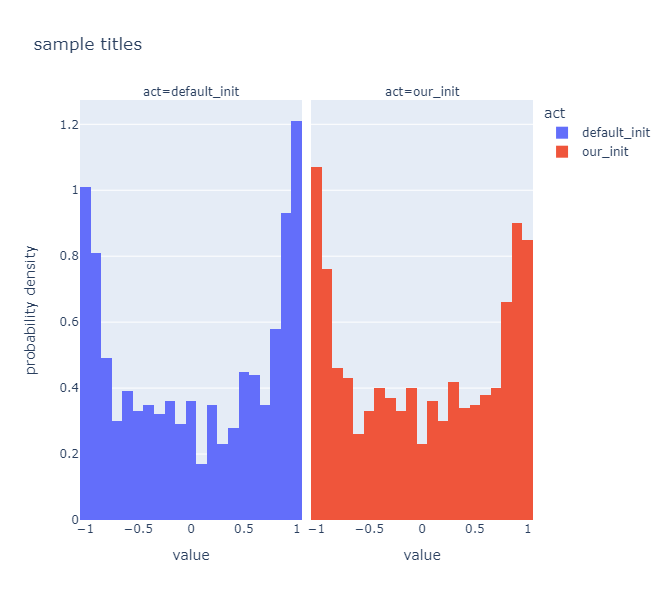

layer_4_act
default_init (2000, 3) in [-0.132, 0.159] μ=0.004 σ=0.074
our_init (2000, 3) in [-0.326, 0.308] μ=-0.012 σ=0.094


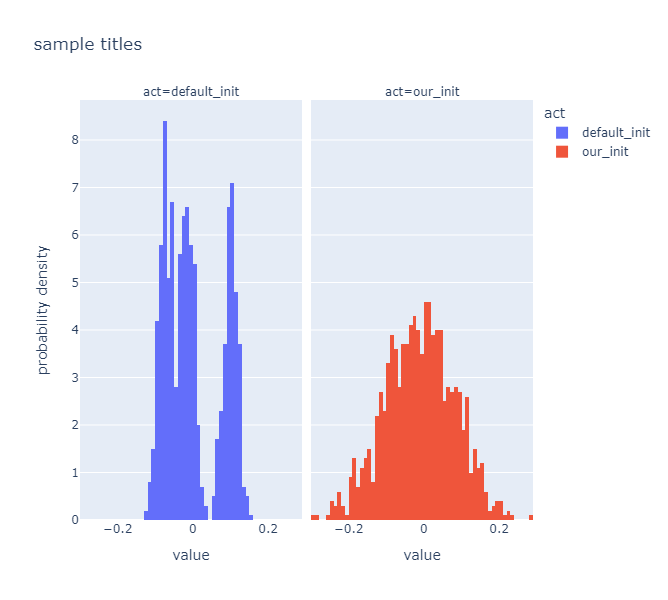

In [20]:

for key, value in out.items():
    print(key)
    
    plot_distributions({'default_init': out_default_init[key], 'our_init': out_our_init[key]})

$\mu \sigma$

In [16]:
for key in out_our_init.keys():
    o = out_default_init[key]
    md, sd = o.mean(), o.std()

    o = out_our_init[key]
    mo, so = o.mean(), o.std()

    print(key, f'(𝜇={md:.3f}, 𝜎={sd:.3f}) vs (𝜇={mo:.3f}, 𝜎={so:.3f})')

input (𝜇=-0.007, 𝜎=0.578) vs (𝜇=-0.007, 𝜎=0.578)
layer_0_preact (𝜇=1.134, 𝜎=14.259) vs (𝜇=-0.688, 𝜎=18.665)
layer_0_act (𝜇=-0.004, 𝜎=0.707) vs (𝜇=-0.002, 𝜎=0.707)
layer_1_preact (𝜇=0.054, 𝜎=1.466) vs (𝜇=0.002, 𝜎=2.816)
layer_1_act (𝜇=0.027, 𝜎=0.714) vs (𝜇=0.001, 𝜎=0.708)
layer_2_preact (𝜇=-0.080, 𝜎=1.497) vs (𝜇=0.109, 𝜎=2.817)
layer_2_act (𝜇=-0.055, 𝜎=0.722) vs (𝜇=0.005, 𝜎=0.707)
layer_3_preact (𝜇=-0.053, 𝜎=1.523) vs (𝜇=-0.081, 𝜎=2.784)
layer_3_act (𝜇=-0.026, 𝜎=0.726) vs (𝜇=-0.002, 𝜎=0.707)
layer_4_act (𝜇=-0.039, 𝜎=0.030) vs (𝜇=-0.004, 𝜎=0.091)
